In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
train=pd.read_csv('Titanic-Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Density'>

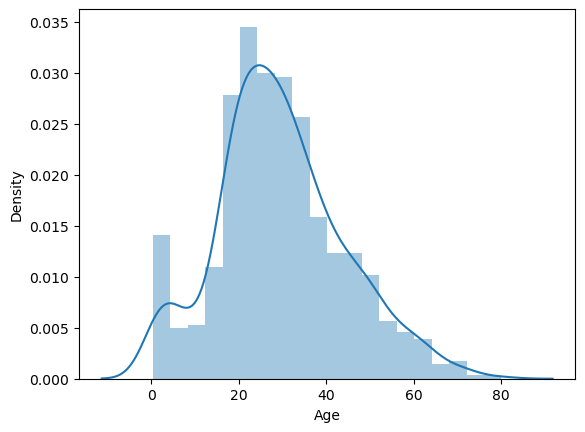

In [5]:
#numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

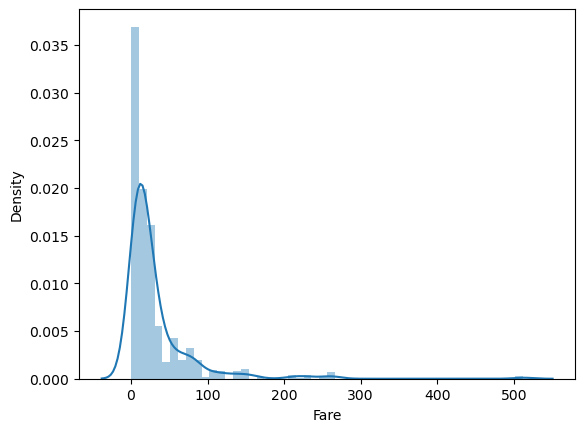

In [6]:
sns.distplot(train['Fare'])

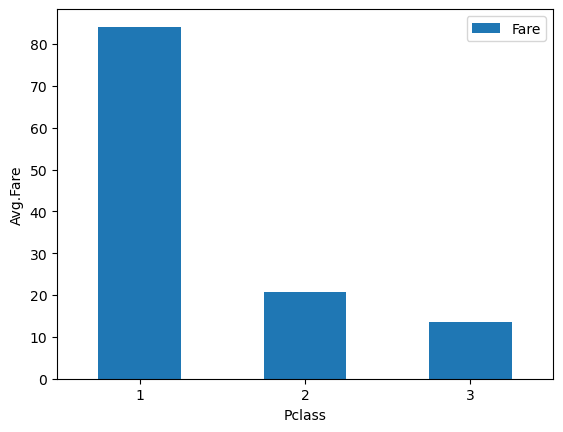

In [7]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare') 
plt.xticks(rotation=0)
plt.show()

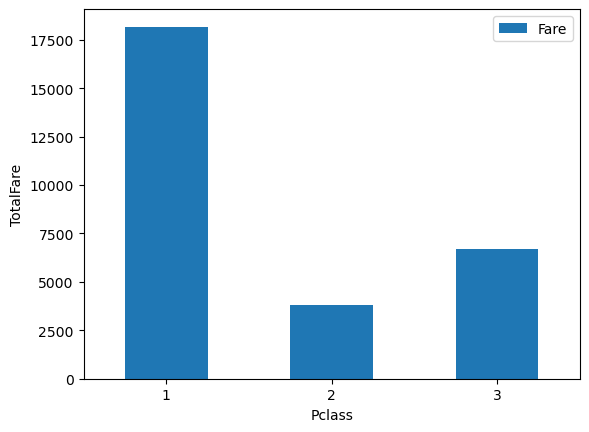

In [8]:
class_fare=train.pivot_table(index='Pclass',values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('TotalFare') 
plt.xticks(rotation=0)
plt.show()

In [9]:
## Data Preprocessing
test=pd.read_csv('Titanic-Dataset.csv')
test.head()
train_len=len(train)
df=pd.concat([train,test],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
#finding null values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [12]:
# drop or deleting the column
df=df.drop(columns=['Cabin'],axis=1)

In [13]:
df['Age'].mean()

29.69911764705882

In [14]:
# fill missing values by using mean of that numerical column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [15]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [16]:
# fill missing values using mode of the categorical column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

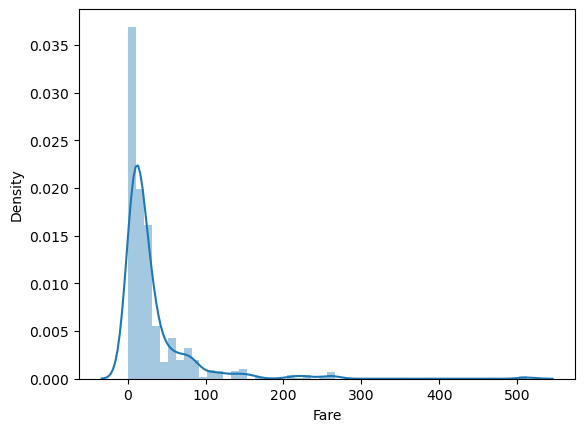

In [17]:
## Log transformation for uniform data distribution
sns.distplot(df['Fare'])

In [18]:
df['Fare']=np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

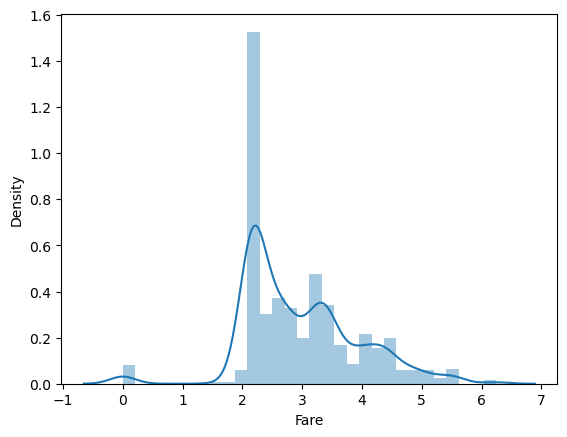

In [19]:
sns.distplot(df['Fare'])

In [20]:
df=df.reset_index(drop=True)

<Axes: >

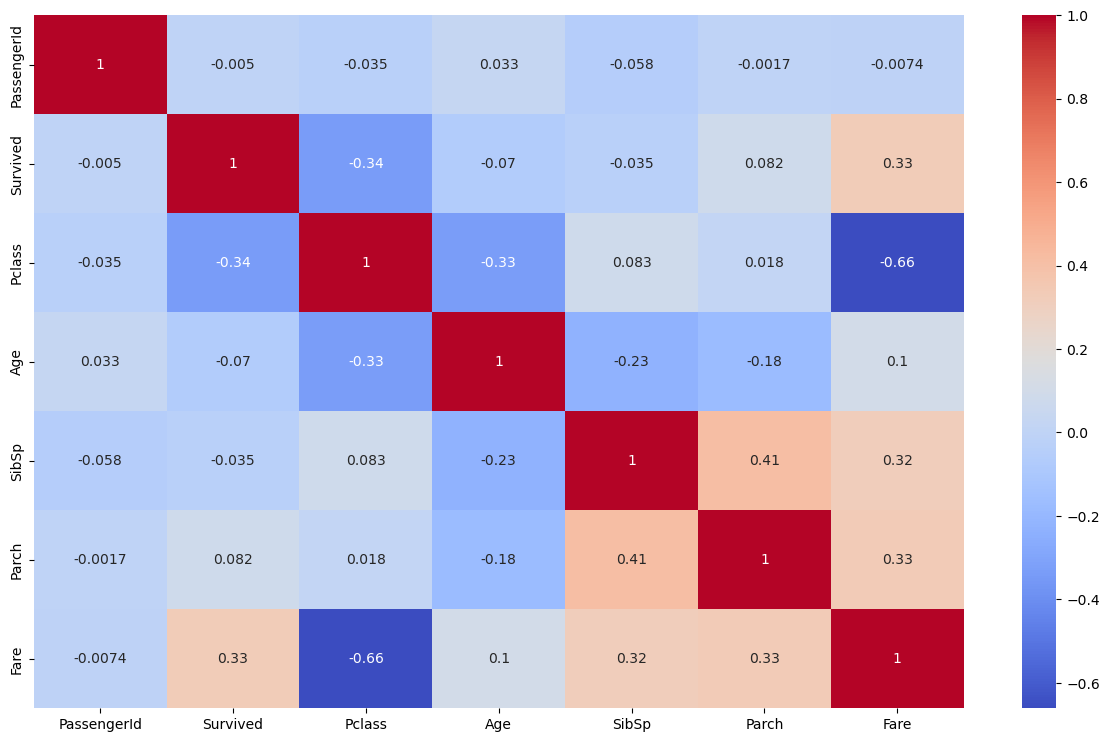

In [21]:
#correlation matrix
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='Pclass', ylabel='Fare'>

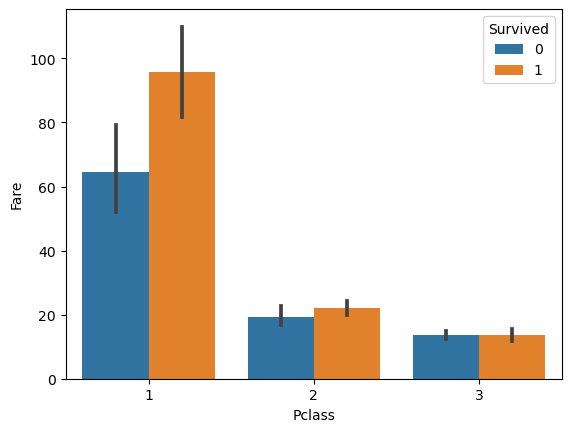

In [22]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

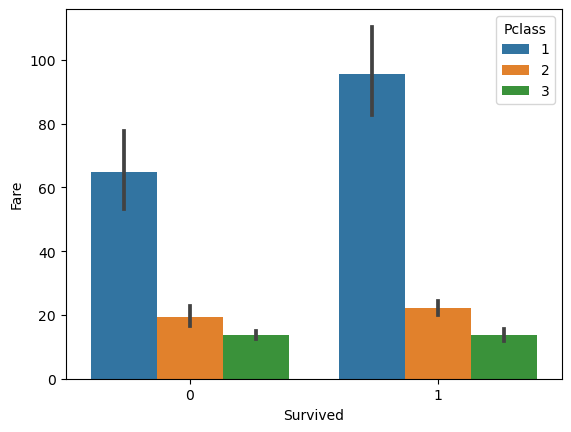

In [23]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')

In [24]:
#drop unnecessary columns
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


In [25]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [26]:
## Train-Test-Split
train=df.iloc[:train_len,:]
test=df.iloc[train_len:,:]

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [28]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,1,0,3,1,22.0,1,0,2.110213,2
892,2,1,1,0,38.0,1,0,4.280593,0
893,3,1,3,0,26.0,0,0,2.188856,2
894,4,1,1,0,35.0,1,0,3.990834,2
895,5,0,3,1,35.0,0,0,2.202765,2


In [29]:
#input split
X=train.drop(columns=['PassengerId','Survived'],axis=1)
Y=train['Survived']

In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [31]:
## Building Model using Logistic Regression
# import train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [32]:
#importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [33]:
#Fit Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
#predicting
predict=lr.predict(X_test)

In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,115,19
Actual Yes,24,65


In [36]:
## import classification report
from sklearn.metrics import classification_report

In [37]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       134
           1       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
#classify column
def classify(model):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    model.fit(X_train,Y_train)
    print('Accuracy:',model.score(X_test,Y_test))
    
    score=cross_val_score(model,X,Y,cv=5)
    print('CV Score:',np.mean(score))

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
classify(model)

Accuracy: 0.43674780922663514
CV Score: 0.3750115477888422


In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.7219730941704036
CV Score: 0.7710940932772582


In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8159625886636117


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model)

Accuracy: 0.7937219730941704
CV Score: 0.7957629778419434


In [50]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


In [54]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [60]:
#complete Model Training with full data
model=LGBMClassifier()
model.fit(X,Y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [61]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,1,0,3,1,22.0,1,0,2.110213,2
892,2,1,1,0,38.0,1,0,4.280593,0
893,3,1,3,0,26.0,0,0,2.188856,2
894,4,1,1,0,35.0,1,0,3.990834,2
895,5,0,3,1,35.0,0,0,2.202765,2


In [65]:
#input split for test data
X_test=test.drop(columns=['PassengerId','Survived'],axis=1)

In [66]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,22.0,1,0,2.110213,2
892,1,0,38.0,1,0,4.280593,0
893,3,0,26.0,0,0,2.188856,2
894,1,0,35.0,1,0,3.990834,2
895,3,1,35.0,0,0,2.202765,2


In [67]:
pred=model.predict(X_test)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,